In [ ]:
#TIME SERIES ANALYSIS

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#Imported Time Series dataset
data = pd.read_csv("AirPassengers.csv")

In [39]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [45]:
#To change month column into datetime format
data["Month"] = pd.to_datetime(data["Month"])

print(data["Month"].head(14))

0    1949-01-01
1    1949-02-01
2    1949-03-01
3    1949-04-01
4    1949-05-01
5    1949-06-01
6    1949-07-01
7    1949-08-01
8    1949-09-01
9    1949-10-01
10   1949-11-01
11   1949-12-01
12   1950-01-01
13   1950-02-01
Name: Month, dtype: datetime64[ns]


In [46]:
data.index = data["Month"]
del data["Month"]

In [49]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


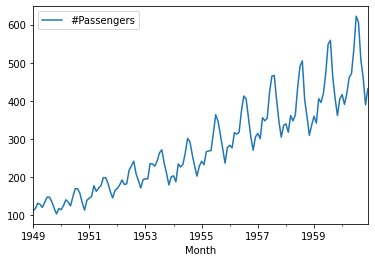

In [53]:
#Visualizing Time Series Data
data.plot()

In [54]:
#Check stationarity

#We will use package statsmodels.tsa.stattools for performing adfuller test.
from statsmodels.tsa.stattools import adfuller

res = adfuller(data["#Passengers"])

In [59]:
print(res)

#Currently our time series is non stationary
#We have to make it stationary by making p value less than 0.05.

#Test-Statistics = 0.8153688792060472 #It is greater than any Critical Value
#p-value = 0.991880243437641
#Lags-Used = 13 #It is a fixed amount of passing time. #Lag1(Y2) = Y1 and Lag4(Y9) = Y5
#No. of Observations Used = 130

#Critical Value(1%) = -3.4816817173418295
#Critical Value(5%) = -2.8840418343195267
#Critical Value(10%) = -2.578770059171598

#For p-value only
print("p-value: ",res[1])

(0.8153688792060472, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
p-value:  0.991880243437641


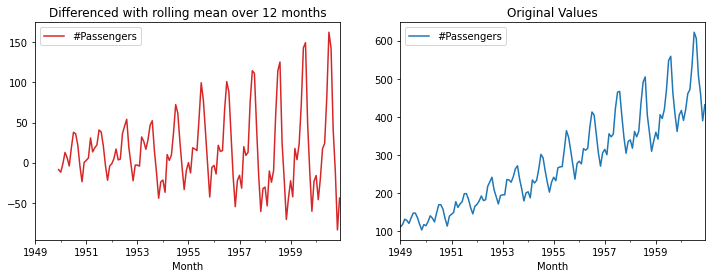

In [76]:
#Remove Trends from the Time Series

rolling_means = data.rolling(window=12).mean()
rolling_mean_detrended = data - rolling_means

a1 = plt.subplot(1,2,1)
rolling_mean_detrended.plot(figsize=(12,4), color="tab:red", title = "Differenced with rolling mean over 12 months", ax = a1)

a2 = plt.subplot(1,2,2)
data.plot(figsize=(12,4), color = "tab:blue", title="Original Values", ax=a2)

In [80]:
#Seasonal Decomposition

#Done with Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

d_res = seasonal_decompose(rolling_mean_detrended.dropna())

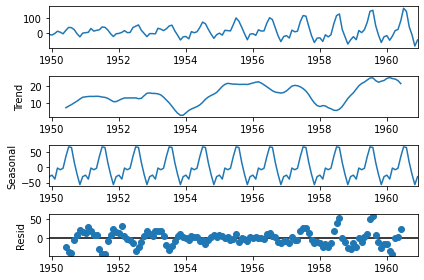

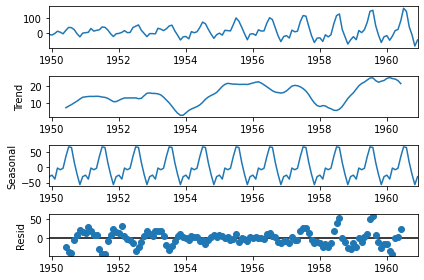

In [81]:
d_res.plot()

#The average value in the series
#The increasing or decreasing value in the series
#The repeating  short-term cycle in the series
#The random variation in the series.


#Two Graphs for - 1. Additive and 2. Multiplicative

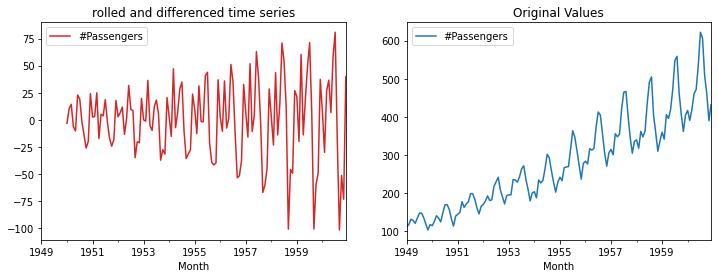

In [86]:
#from pandas.core.window import rolling
#Remove Seasonality

#.shift() - it just shift index by desired number of periods with an optimal time frequency.
r_m_d = rolling_mean_detrended - rolling_mean_detrended.shift()

a1 = plt.subplot(121)
r_m_d.plot(figsize=(12,4), color="tab:red", title = "rolled and differenced time series", ax = a1)

a2 = plt.subplot(122)
data.plot(figsize=(12,4), color = "tab:blue", title="Original Values", ax=a2)

In [88]:
r_m_d = r_m_d.dropna()

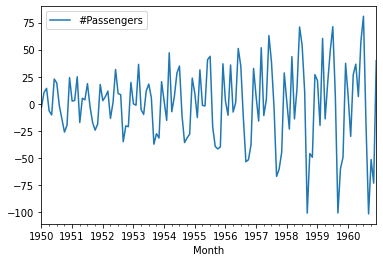

In [85]:
r_m_d.plot() #After removing trends and seasonality, also null values from it, our graphs is:

In [89]:
r_m_d

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


In [90]:
res = adfuller(r_m_d["#Passengers"].dropna())

In [92]:
print(res)

#p-value is less than 0.05
print("p-value: ", res[1])

#It means time series is stationary.

(-3.1544826348635744, 0.022775264967859313, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 908.7516655845259)
p-value:  0.022775264967859313


In [97]:
#Autocorrelation is the correlation of a series with its own lags, if a series is significantly autocorrelated that means, the previous values
# of the series may be helpful in predicting the current value.

#Partial Correlation is also conveys the similar information, but it conveys the pure correlation of a series and its lag, excluding the correlation,
#contributes from the intermediate lags.

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(r_m_d["#Passengers"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


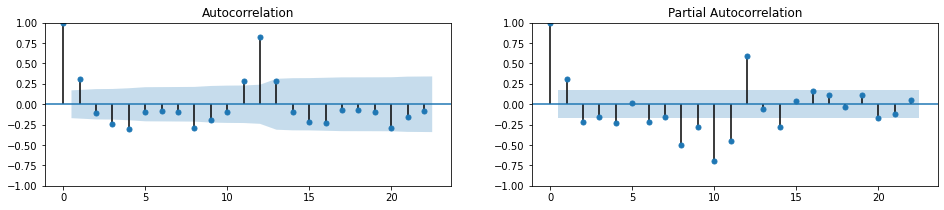

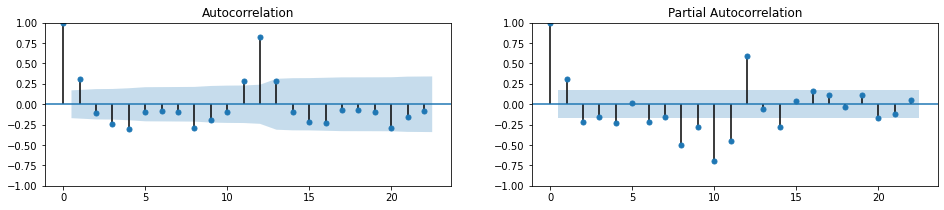

In [103]:
fig, axes  = plt.subplots(1,2, figsize=(16,3))
plot_acf(r_m_d["#Passengers"], ax = axes[0])
plot_pacf(r_m_d["#Passengers"], ax = axes[1])

In [104]:
#from statsmodels.graphics.tsaplots import plot_pacf

#plot_pacf(r_m_d["#Passengers"])

In [105]:
!pip install pmdarima


In [33]:
#!pip uninstall statsmodels

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.2


In [34]:
#!pip install statsmodels

  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [106]:
from pmdarima import auto_arima

In [107]:
order = auto_arima(r_m_d["#Passengers"], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sun, 15 May 2022   AIC                           1235.785
Time:                        16:48:27   BIC                           1255.964
Sample:                             0   HQIC                          1243.985
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.347      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9137      0.128     -7.155      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.884      0.000      -1.150      -0.492
ma.L3          0.7469      0.095      7.852      0.000       0.560       0.933
sigma2       586.2017     67.807      8.645      0.000     453.303     719.100
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
from statsmodels.tsa.arima.model import ARIMA

train = r_m_d.iloc[:120]["#Passengers"]
test = r_m_d.iloc[121:]["#Passengers"]

#print(train)
#print(test)

In [118]:
model = ARIMA(train, order=(3,0,3))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

In [119]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -546.713
Date:                Sun, 15 May 2022   AIC                           1109.427
Time:                        16:59:05   BIC                           1131.727
Sample:                    01-01-1950   HQIC                          1118.483
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.040      1.629      0.103      -0.013       0.143
ar.L1          0.7921      0.116      6.837      0.000       0.565       1.019
ar.L2          0.3299      0.133      2.481      0.013       0.069       0.591
ar.L3         -0.5813      0.077     -7.571      0.000      -0.732      -0.431
ma.L1         -0.8687      2.573     -0.338      0.736      -5.912       4.174
ma.L2         -0.9992      2.302     -0.434      0.664      -5.511       3.513
ma.L3          0.8680      2.733      0.318      0.751      -4.488       6.224
sigma2       484.3012   1594.582      0.304      0.761   -2641.022    3609.624
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.98   Prob(JB):                         0.92
Heteroskedasticity (H):               5.91   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
r_m_d["predict"] = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


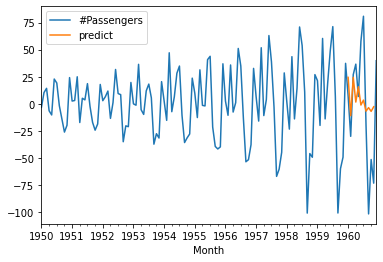

In [121]:
r_m_d[["#Passengers","predict"]].plot()

In [132]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(3,0,3), seasonal_order=(3,0,3,12))
model = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting 

In [133]:
r_m_d["predict"] = model.predict(start = len(train), end = len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


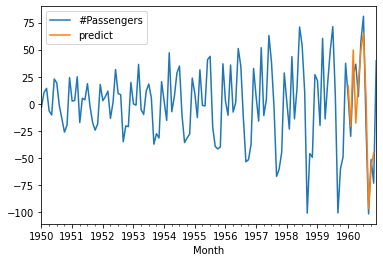

In [134]:
r_m_d[["#Passengers","predict"]].plot()

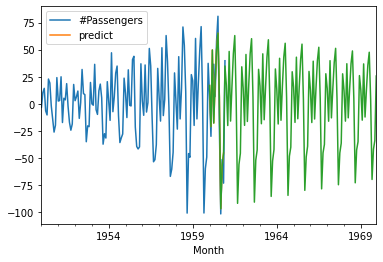

In [136]:
fcast = model.forecast(steps = 120) #12*5 = 60 # 5 years result
r_m_d.plot()
fcast.plot()

In [137]:
fcast

1960-01-01    16.876338
1960-02-01   -21.074615
1960-03-01    49.671198
1960-04-01   -17.818401
1960-05-01    19.608182
                ...    
1969-08-01     4.130271
1969-09-01   -69.934573
1969-10-01   -42.050695
1969-11-01   -33.904006
1969-12-01    25.624600
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

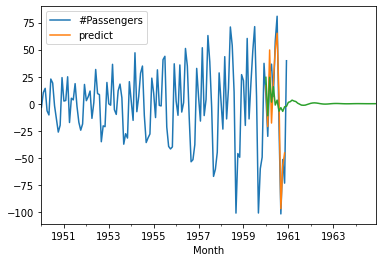

In [31]:
#Unaccurate Data

fcast1 = model_fit.forecast(steps = 60)
r_m_d.plot()
fcast1.plot()

In [1]:
model.plot()

NameError: name 'model' is not defined